# Section 1: Cleaning the Data

In [339]:
# Imports
import pandas as pd
from IPython.display import display
# Import datatypes for parameter type specification
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Produce knn boundary graphs
from sklearn.inspection import DecisionBoundaryDisplay
import seaborn as sns

# Import datatypes for parameter type specification
from pandas.core import frame
from sklearn.preprocessing._label import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

Load the dataset from a file to a dataframe. Drop any attributes with irrelevant data.

In [340]:
# Load the data file
df = pd.read_csv("./ford.csv")

# drop unecessary columns
df = df.drop(["tax"], axis=1)

print(df.shape)
display(df.head())

(17965, 8)


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


In [341]:
models = df.model.unique()
fuelTypes = df.fuelType.unique()
transmissions = df.transmission.unique()

print("Models\n", models,
      "\n\nFuel Types\n", fuelTypes,
      "\n\nTransmissions\n", transmissions,)

Models
 [' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang' ' Grand Tourneo Connect'
 ' Fusion' ' Ranger' ' Streetka' ' Escort' ' Transit Tourneo'] 

Fuel Types
 ['Petrol' 'Diesel' 'Hybrid' 'Electric' 'Other'] 

Transmissions
 ['Automatic' 'Manual' 'Semi-Auto']


### Convert categorical data to numeric format
The target feature is car model. Use `sklearn.preprocessing.LabelEncoder()` to ordinalize the target feature. Also encode the other categorical features as 0 or 1 for each category using `pandas.get_dummies()`. 

In [342]:
print(df.dtypes)

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
mpg             float64
engineSize      float64
dtype: object


In [343]:
transmissionNumeric = pd.get_dummies(df.transmission)
df = pd.concat([df.drop("transmission", axis=1), transmissionNumeric], axis=1)
fuelTypeNumeric = pd.get_dummies(df.fuelType)
df = pd.concat([df.drop("fuelType", axis=1), fuelTypeNumeric], axis=1)
display(df.head())
df.to_csv("clean1_Ford.csv", index=False)

,model,year,price,mileage,mpg,engineSize,Automatic,Manual,Semi-Auto,Diesel,Electric,Hybrid,Other,Petrol
0,Fiesta,2017,12000,15944,57.7,1.0,1,0,0,0,0,0,0,1
1,Focus,2018,14000,9083,57.7,1.0,0,1,0,0,0,0,0,1
2,Focus,2017,13000,12456,57.7,1.0,0,1,0,0,0,0,0,1
3,Fiesta,2019,17500,10460,40.3,1.5,0,1,0,0,0,0,0,1
4,Fiesta,2019,16500,1482,48.7,1.0,1,0,0,0,0,0,0,1


### Drop attributes or records to fine-tune the KNN model

A KNN model on the full dataset yields a high misclassification rate for certain cars such as the "Tourneo Connect" and the "Fusion" models. The cars with higher misclassification rates will isolated to a separate KNN model to study the behavior related to the high misclassification rates.

The primary dataset to be examined is stored to `df` and is exported to the "clean1_Ford.csv" file. 

The car models with high misclassification rates are stored in `df2` and exported to the "clean2_Ford.csv" file.

In [344]:
df2 = df[df.model == ' Grand Tourneo Connect']
df2 = pd.concat([df2, df[df.model == ' Tourneo Connect']])
df2 = pd.concat([df2, df[df.model == ' Transit Tourneo']])
df2 = pd.concat([df2, df[df.model == ' Tourneo Custom']])
df2 = pd.concat([df2, df[df.model == ' Fusion']])
df2 = pd.concat([df2, df[df.model == ' Ranger']])
df2 = pd.concat([df2, df[df.model == ' Streetka']])
df2 = pd.concat([df2, df[df.model == ' Escort']])
df2 = pd.concat([df2, df[df.model == ' Grand C-MAX']])
df2 = pd.concat([df2, df[df.model == ' Mondeo']])
df2 = pd.concat([df2, df[df.model == ' S-MAX']])
df2.to_csv("clean2_Ford.csv", index=False)

df = df[df.model != ' Grand Tourneo Connect']
df = df[df.model != ' Tourneo Connect']
df = df[df.model != ' Transit Tourneo']
df = df[df.model != ' Tourneo Custom']
df = df[df.model != ' Fusion']
df = df[df.model != ' Ranger']
df = df[df.model != ' Streetka']
df = df[df.model != ' Escort']
df = df[df.model != ' Grand C-MAX']
df = df[df.model != ' Mondeo']
df = df[df.model != ' S-MAX']
df.to_csv("clean1_Ford.csv", index=False)

---

# Section 2 : Scaling the Data

Scale the primary dataset. Additionaly, multiply the "mpg scaled" attribute by a weight of `mpg_weight` to adjust the impact for groupings of this attribute.

In [345]:
mpg_weight = 7.0

In [346]:
df = pd.read_csv("clean1_Ford.csv")

In [347]:
scaler = StandardScaler()
X = df.drop("model", axis=1)
scaler.fit(X)
X_scaled = scaler.transform(X)
X.columns = X.columns + " scaled"
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
display(X_scaled.head())

,year scaled,price scaled,mileage scaled,mpg scaled,engineSize scaled,Automatic scaled,Manual scaled,Semi-Auto scaled,Diesel scaled,Electric scaled,Hybrid scaled,Other scaled,Petrol scaled
0,0.043112,-0.035583,-0.355781,-0.032639,-0.754227,3.736749,-2.638719,-0.249841,-0.628987,0.0,-0.01895,0.0,0.629543
1,0.541778,0.394799,-0.734426,-0.032639,-0.754227,-0.267612,0.378972,-0.249841,-0.628987,0.0,-0.01895,0.0,0.629543
2,0.043112,0.179608,-0.548277,-0.032639,-0.754227,-0.267612,0.378972,-0.249841,-0.628987,0.0,-0.01895,0.0,0.629543
3,1.040445,1.147968,-0.658432,-1.756433,0.430895,-0.267612,0.378972,-0.249841,-0.628987,0.0,-0.01895,0.0,0.629543
4,1.040445,0.932777,-1.153911,-0.924256,-0.754227,3.736749,-2.638719,-0.249841,-0.628987,0.0,-0.01895,0.0,0.629543


In [348]:
# adjust the 'mpg scaled' feature
mpg_scaled = X_scaled["mpg scaled"].to_frame()*mpg_weight
X_scaled = pd.concat([X_scaled.drop("mpg scaled", axis=1), mpg_scaled], axis=1)

In [349]:
pd.DataFrame(scaler.mean_).to_csv("mean.csv", index=False)
pd.DataFrame(scaler.var_).to_csv("variance.csv", index=False)
X_scaled.to_csv("X_scaled.csv", index=False)
df.model.to_csv("y.csv", index=False)


Scale the secondary dataset

In [350]:
df2 = pd.read_csv("clean2_Ford.csv")

In [351]:
scaler2 = StandardScaler()
X2 = df2.drop("model", axis=1)
scaler2.fit(X2)
X2_scaled = scaler2.transform(X2)
X2.columns = X2.columns + " scaled"
X2_scaled = pd.DataFrame(X2_scaled, columns=X2.columns)
display(X2_scaled.head())

,year scaled,price scaled,mileage scaled,mpg scaled,engineSize scaled,Automatic scaled,Manual scaled,Semi-Auto scaled,Diesel scaled,Electric scaled,Hybrid scaled,Other scaled,Petrol scaled
0,1.107461,1.098055,-1.110060,0.493072,-0.896748,-0.492244,0.622027,-0.302693,0.470829,-0.040016,-0.113822,-0.028284,-0.44657
1,0.706351,0.386980,-0.907859,0.031644,-0.896748,2.031514,-1.607646,-0.302693,0.470829,-0.040016,-0.113822,-0.028284,-0.44657
2,0.305241,0.033660,-1.064256,0.493072,-0.896748,-0.492244,0.622027,-0.302693,0.470829,-0.040016,-0.113822,-0.028284,-0.44657
3,1.107461,1.098055,-1.110060,0.493072,-0.896748,-0.492244,0.622027,-0.302693,0.470829,-0.040016,-0.113822,-0.028284,-0.44657
4,0.706351,0.386980,-0.907859,0.031644,-0.896748,2.031514,-1.607646,-0.302693,0.470829,-0.040016,-0.113822,-0.028284,-0.44657


In [352]:
mpg_scaled = X2_scaled["mpg scaled"].to_frame()*mpg_weight
X2_scaled = pd.concat([X2_scaled.drop("mpg scaled", axis=1), mpg_scaled], axis=1)

In [353]:
pd.DataFrame(scaler2.mean_).to_csv("mean2.csv", index=False)
pd.DataFrame(scaler2.var_).to_csv("variance2.csv", index=False)
X2_scaled.to_csv("X2_scaled.csv", index=False)
df2.model.to_csv("y2.csv", index=False)


---

# Section 3: Designing the KNN Model

Define functions that quickly encode and decode categorical features stored in a column of a dataframe

Read the scaled data from files. Store the features and targets to variables. These variables will be used for train-test splitting.

In [354]:
# read scaled data for non-target attributes
X_scaled = pd.read_csv("X_scaled.csv")

# read the target attribute
y = pd.read_csv("y.csv")

Read scaled data from files for the secondary dataset.

In [355]:
X2_scaled = pd.read_csv("X2_scaled.csv")
y2 = pd.read_csv("y2.csv")

### study interactions
Divide data into training and test sets

In [356]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, random_state=0)
X2_train_scaled, X2_test_scaled, y2_train, y2_test = train_test_split(X2_scaled, y2, random_state=0)

### Plot a 2d knn as an example

##### Select two attributes for the example KNN model

In [357]:
# primary dataset
names_2d = ["mpg scaled", "price scaled"]
X_2d_train = X_train_scaled.loc[:, names_2d]
y_train = np.ravel(y_train)

# secondary dataset
X2_2d_train = X2_train_scaled.loc[:, names_2d]
y2_train = np.ravel(y2_train)

##### Build the sample model from the training set
- show boundaries for the trained model.
- points from the training set are labeled based on the car models

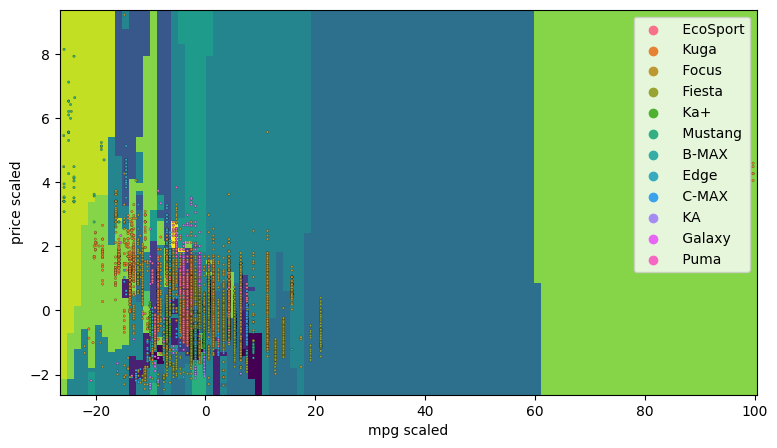

In [358]:
knn = KNeighborsClassifier(n_neighbors=9, weights="distance")
knn.fit(X_2d_train, y_train)
_, ax = plt.subplots()

DecisionBoundaryDisplay.from_estimator(
    knn,
    X_2d_train,
    grid_resolution=100,
    eps=0.1,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel=names_2d[0],
    ylabel=names_2d[1],
    shading="auto",
)

# Plot also the training points
sns.scatterplot(
    x=X_2d_train[names_2d[0]],
    y=X_2d_train[names_2d[1]],
    hue=y_train,
    alpha=1.0,
    edgecolor="black",
    s=3
)

plt.gcf().set_size_inches(9,5)
plt.gcf().align_xlabels()

plt.show()


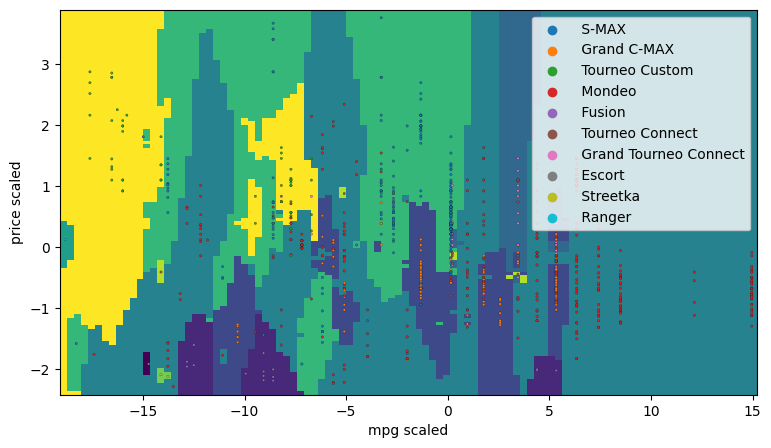

In [359]:
knn = KNeighborsClassifier(n_neighbors=9, weights="distance")
knn.fit(X2_2d_train, y2_train)
_, ax = plt.subplots()

DecisionBoundaryDisplay.from_estimator(
    knn,
    X2_2d_train,
    grid_resolution=100,
    eps=0.1,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel=names_2d[0],
    ylabel=names_2d[1],
    shading="auto",
)

# Plot also the training points
sns.scatterplot(
    x=X2_2d_train[names_2d[0]],
    y=X2_2d_train[names_2d[1]],
    hue=y2_train,
    alpha=1.0,
    edgecolor="black",
    s=3
)

plt.gcf().set_size_inches(9,5)
plt.gcf().align_xlabels()

plt.show()


### Assess accuracy for the sample KNN model

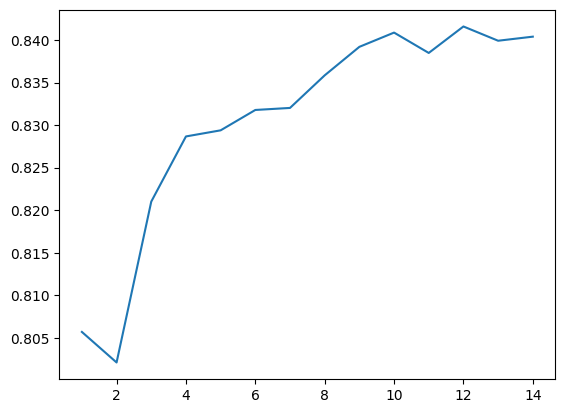

In [360]:
X_2d_test = X_test_scaled.loc[:,[names_2d[0],names_2d[1]]]

arr = np.array([])
y_test = y_test.squeeze()
for n in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_2d_train, y_train)
    y_predict = knn.predict(X_2d_test)
    m = np.mean(y_predict == y_test)
    arr = np.append(arr, np.array(m))
plt.plot(range(1, arr.size+1), arr)
plt.show()

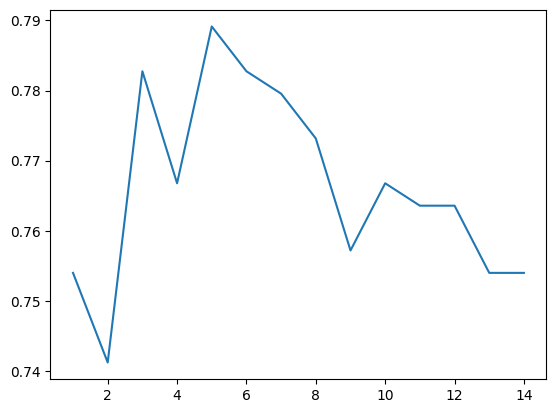

In [361]:
X2_2d_test = X2_test_scaled.loc[:,[names_2d[0],names_2d[1]]]

arr = np.array([])
y2_test = y2_test.squeeze()
for n in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X2_2d_train, y2_train)
    y2_predict = knn.predict(X2_2d_test)
    m = np.mean(y2_predict == y2_test)
    arr = np.append(arr, np.array(m))
plt.plot(range(1, arr.size+1), arr)
plt.show()

In [362]:
# Sample data still being used.
# let's try a specific value of k
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_2d_train, y_train)
y_predict = knn.predict(X_2d_test)
m = np.mean(y_predict == y_test)
arr = np.append(arr, np.array(m))
display(knn.score(X_2d_test, y_test))

misclassified_y = y_test[y_test != y_predict]

0.8391959798994975

In [363]:
# Sample data still being used.
# let's try a specific value of k
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X2_2d_train, y2_train)
y2_predict = knn.predict(X2_2d_test)
m = np.mean(y2_predict == y2_test)
arr = np.append(arr, np.array(m))
display(knn.score(X2_2d_test, y2_test))

misclassified_y2 = y2_test[y2_test != y2_predict]

0.7571884984025559

array([' KA', ' Focus', ' Kuga', ' Fiesta', ' B-MAX', ' Ka+', ' Edge',
       ' EcoSport', ' C-MAX', ' Galaxy', ' Puma', ' Mustang'],
      dtype=object)

(672,)

672

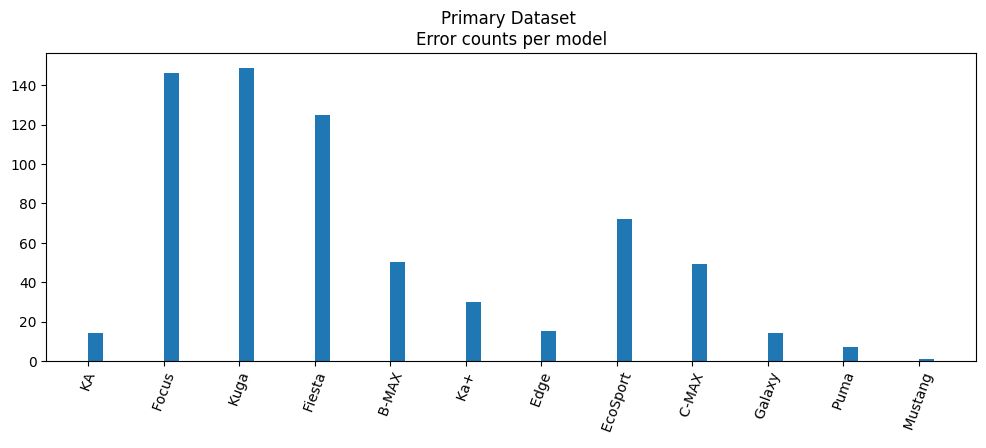

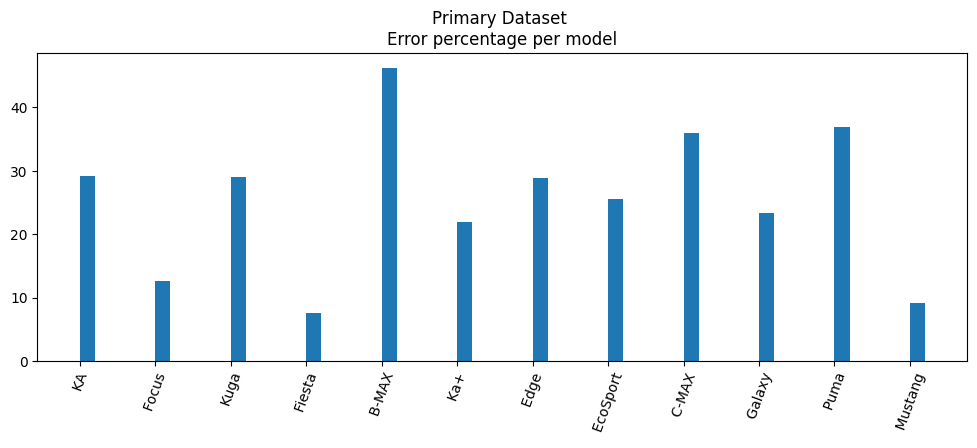

In [364]:
names = misclassified_y.unique()
sum = 0
error_counts = np.array([])
name_counts = np.array([])
for name in names:
    errors = misclassified_y[misclassified_y == name].shape[0]
    sum += errors
    error_counts = np.append(error_counts, np.array(errors))
    name_total = y_test[y_test == name].shape[0]
    name_counts = np.append(name_counts, np.array(name_total))
display(names, misclassified_y.shape, sum)

error_percentage = 100 * error_counts / name_counts



# Plot misclassifications
plt.figure(figsize=(12, 4))
plt.bar(range(error_counts.size), height=error_counts, align='edge', width=0.2)
plt.xticks(range(error_counts.size), names, rotation=70)
plt.title("Primary Dataset \nError counts per model")
plt.show()

plt.figure(figsize=(12, 4))
plt.bar(range(error_counts.size), height=error_percentage, align='edge', width=0.2)
plt.xticks(range(error_counts.size), names, rotation=70)
plt.title("Primary Dataset \nError percentage per model")
plt.show()

array([' Grand Tourneo Connect', ' Grand C-MAX', ' Mondeo', ' S-MAX',
       ' Tourneo Connect', ' Transit Tourneo', ' Tourneo Custom'],
      dtype=object)

(76,)

76

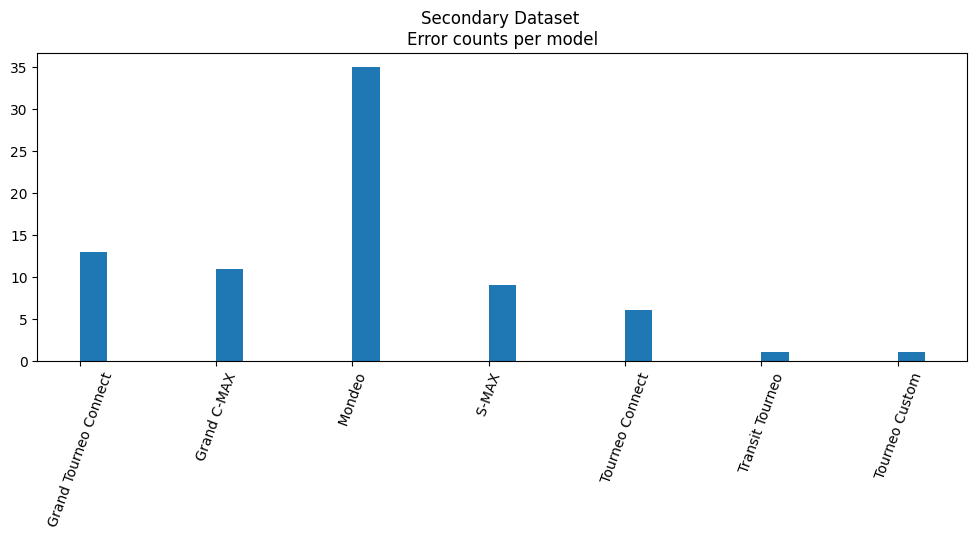

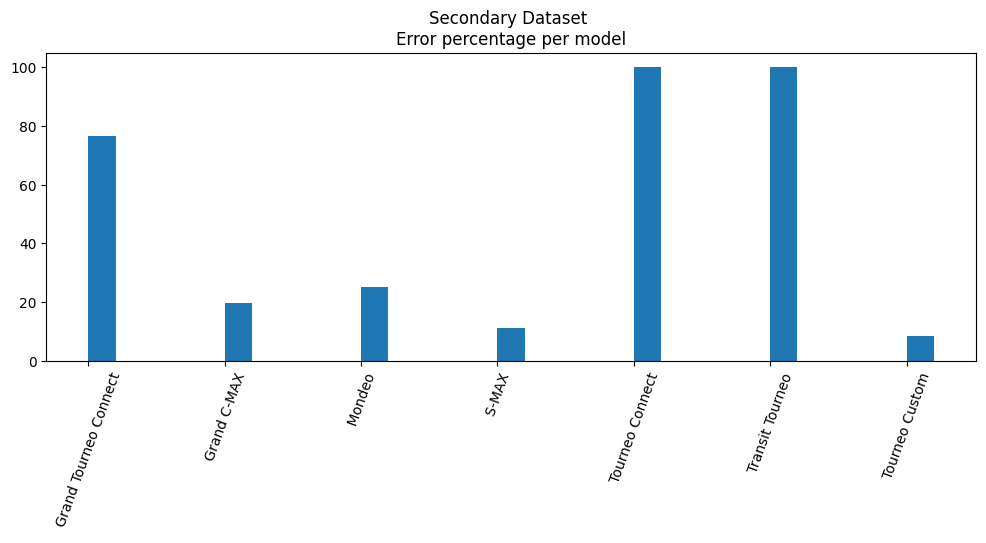

In [365]:
names = misclassified_y2.unique()
sum = 0
error_counts = np.array([])
name_counts = np.array([])
for name in names:
    errors = misclassified_y2[misclassified_y2 == name].shape[0]
    sum += errors
    error_counts = np.append(error_counts, np.array(errors))
    name_total = y2_test[y2_test == name].shape[0]
    name_counts = np.append(name_counts, np.array(name_total))
display(names, misclassified_y2.shape, sum)

error_percentage = 100 * error_counts / name_counts



# Plot misclassifications
plt.figure(figsize=(12, 4))
plt.bar(range(error_counts.size), height=error_counts, align='edge', width=0.2)
plt.xticks(range(error_counts.size), names, rotation=70)
plt.title("Secondary Dataset \nError counts per model")
plt.show()

plt.figure(figsize=(12, 4))
plt.bar(range(error_counts.size), height=error_percentage, align='edge', width=0.2)
plt.xticks(range(error_counts.size), names, rotation=70)
plt.title("Secondary Dataset \nError percentage per model")
plt.show()

--- 

# Section 4: Decision Tree Comparision

Create a decision tree and a KNN from the primary dataset and compare accuracies of each model

In [366]:
tree = DecisionTreeClassifier(random_state=0)
knn = KNeighborsClassifier()


# import the scaled data and split into training and test sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(pd.read_csv("X_scaled.csv"), pd.read_csv("y.csv"), random_state=0)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

tree.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)
display() # hacky way to clear the output

In [367]:
display(tree.score(X_test_scaled, y_test), knn.score(X_test_scaled, y_test))

0.9466379516630773

0.9483129935391242

Create a decision tree and a KNN from the secondary dataset and compare accuracies of each model

In [368]:
tree = DecisionTreeClassifier(random_state=0)
knn = KNeighborsClassifier()


# import the scaled data and split into training and test sets
X2_train_scaled, X2_test_scaled, y2_train, y2_test = train_test_split(pd.read_csv("X2_scaled.csv"), pd.read_csv("y2.csv"), random_state=0)
y2_train = np.ravel(y2_train)
y2_test = np.ravel(y2_test)

tree.fit(X2_train_scaled, y2_train)
knn.fit(X2_train_scaled, y2_train)
display() # hacky way to clear the output

In [369]:
display(tree.score(X2_test_scaled, y2_test), knn.score(X2_test_scaled, y2_test))

0.8977635782747604

0.9105431309904153

---